<a href="https://colab.research.google.com/github/Aggarwal164/e-commerce-furniture-dataset/blob/main/ecommerce_furniture_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/ecommerce_furniture_dataset_2024.csv")

In [6]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [7]:
df.shape

(2000, 5)

In [8]:
df.duplicated().sum()

np.int64(94)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

,0
productTitle,0
originalPrice,1436
price,0
sold,0
tagText,2


In [11]:
# Clean price columns: remove $, commas → convert to float
for col in ["price", "originalPrice"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [12]:
# Handle missing originalPrice
df["originalPrice"] = df["originalPrice"].fillna(df["price"])

In [13]:
# Fill missing tagText
df["tagText"] = df["tagText"].fillna("Unknown")

In [14]:

# Discount percentage
df["discount_pct"] = (
    (df["originalPrice"] - df["price"]) / df["originalPrice"]
) * 100
df["discount_pct"] = df["discount_pct"].round(2)

In [15]:
# Revenue calculation
df["revenue"] = df["price"] * df["sold"]

In [16]:
# Log transform sold
df["sold_log"] = np.log1p(df["sold"])

In [17]:
df["price_to_original_ratio"] = df["price"] / df["originalPrice"]

In [18]:
df.head()


,productTitle,originalPrice,price,sold,tagText,discount_pct,revenue,sold_log,price_to_original_ratio
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,600,Free shipping,0.00,28074.00,6.398595,1.000000
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0,Free shipping,0.00,0.00,0.000000,1.000000
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.67,276.22,2.079442,0.503316
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0,Free shipping,0.00,0.00,0.000000,1.000000
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.23,21.37,0.693147,0.437730


In [19]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   productTitle             1906 non-null   object 
 1   originalPrice            1906 non-null   float64
 2   price                    1906 non-null   float64
 3   sold                     1906 non-null   int64  
 4   tagText                  1906 non-null   object 
 5   discount_pct             1906 non-null   float64
 6   revenue                  1906 non-null   float64
 7   sold_log                 1906 non-null   float64
 8   price_to_original_ratio  1906 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 148.9+ KB
None
       originalPrice        price          sold  discount_pct        revenue  \
count    1906.000000  1906.000000   1906.000000   1906.000000    1906.000000   
mean      186.709706   154.360152     24.449633     11.588841    1107.453767

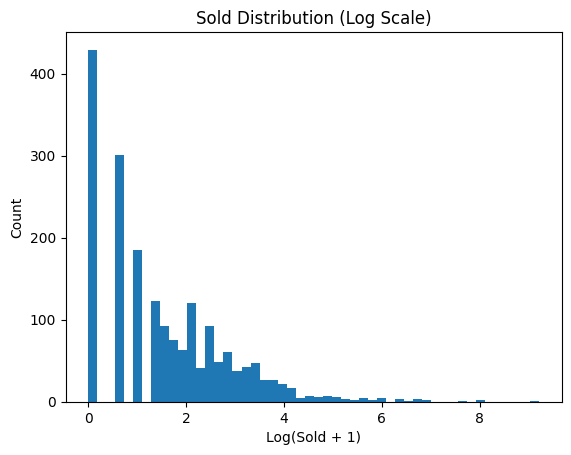

In [20]:
# sold distribution

plt.figure()
plt.hist(df["sold_log"], bins=50)
plt.title("Sold Distribution (Log Scale)")
plt.xlabel("Log(Sold + 1)")
plt.ylabel("Count")
plt.show()

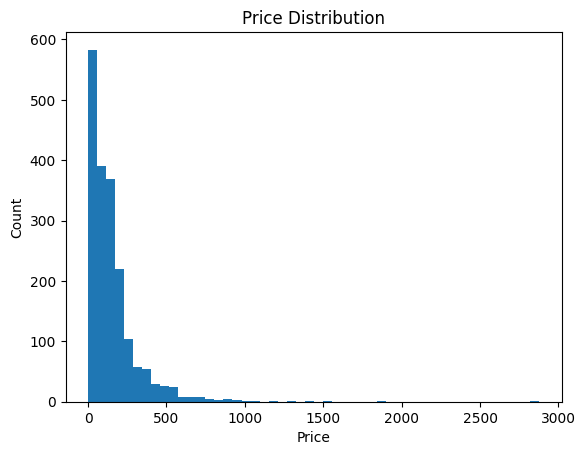

In [21]:
# price distribution

plt.figure()
plt.hist(df["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

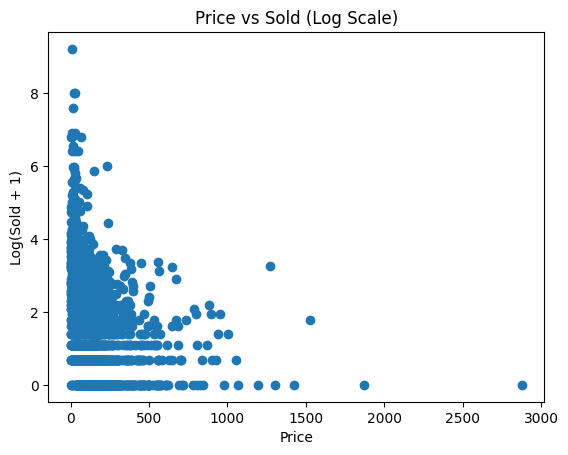

In [22]:
# price vs sold

plt.figure()
plt.scatter(df["price"], df["sold_log"])
plt.title("Price vs Sold (Log Scale)")
plt.xlabel("Price")
plt.ylabel("Log(Sold + 1)")
plt.show()

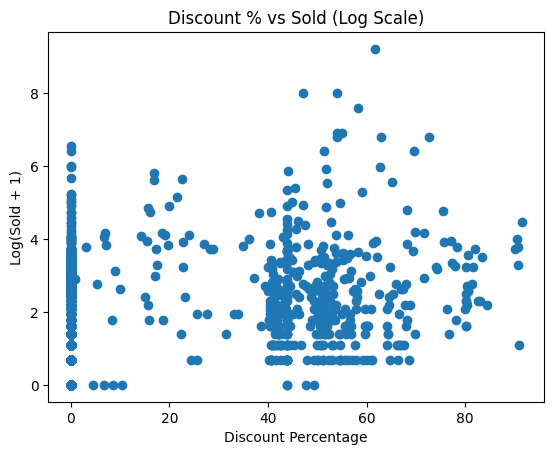

In [23]:
# Discount vs Sold

plt.figure()
plt.scatter(df["discount_pct"], df["sold_log"])
plt.title("Discount % vs Sold (Log Scale)")
plt.xlabel("Discount Percentage")
plt.ylabel("Log(Sold + 1)")
plt.show()

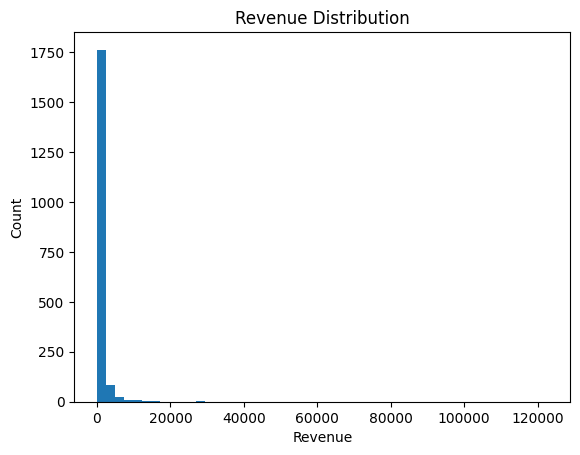

In [24]:
#  Revenue Distribution

plt.figure()
plt.hist(df["revenue"], bins=50)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

In [25]:
features = [
    "price",
    "originalPrice",
    "discount_pct",
    "price_to_original_ratio"
    ]

In [26]:
X = df[features]
y = df["sold_log"]

In [27]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 1. Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

In [31]:
print("Linear Regression Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Linear Regression Metrics:
Mean Absolute Error: 0.9479575570147251
R-squared: 0.20842911245215245


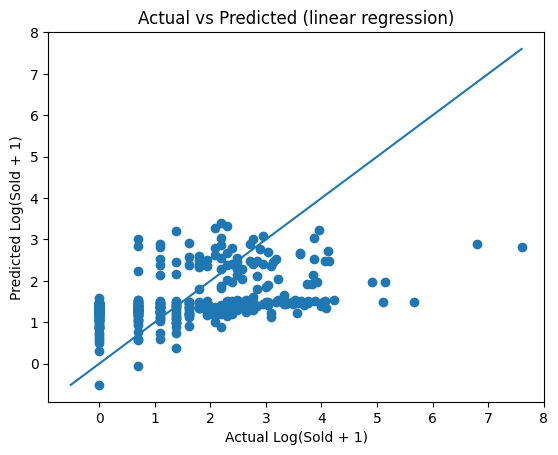

In [32]:
# Actual vs Predicted Plot

plt.figure()
plt.scatter(y_test, y_pred)

# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("Actual Log(Sold + 1)")
plt.ylabel("Predicted Log(Sold + 1)")
plt.title("Actual vs Predicted (linear regression)")
plt.show()

In [33]:
# 2. Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred)

rf_r2 = r2_score(y_test, y_pred)

In [34]:
print("Random Forest Regressor Metrics:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared: {rf_r2}")

Random Forest Regressor Metrics:
Mean Absolute Error: 0.9011758936824729
R-squared: 0.2740556096325055


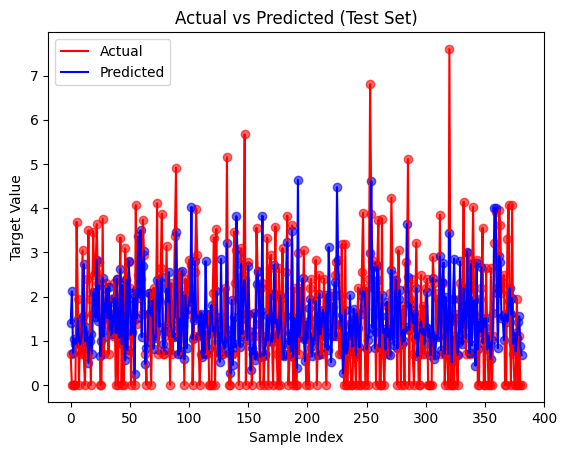

In [35]:
plt.figure()

# Line plot
plt.plot(y_test.values, label="Actual", color="red")
plt.plot(y_pred, label="Predicted", color="blue")

# Scatter points
plt.scatter(range(len(y_test)), y_test.values, color="red", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color="blue", alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()